<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/ECT3695/Notebooks_MLP/Classifica%C3%A7%C3%A3o_MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Dígitos com Multilayer Perceptron

## Importando Bibliotecas Necessárias

In [1]:
# Importando as bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Carregando e Pré-processando os Dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Imprimindo o shape
print(np.shape(x_train))
print(np.shape(x_test))

(60000, 28, 28)
(10000, 28, 28)


## Visualizando uma Amostra de Imagens

### Imagens de treino

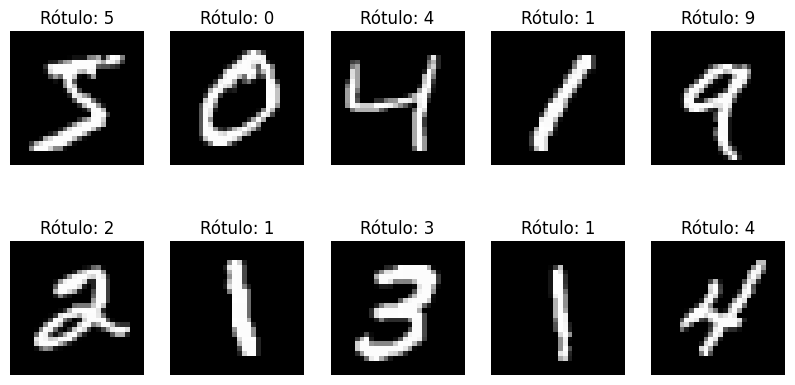

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Rótulo: {y_train[i]}')
plt.show()

### Imagens de teste

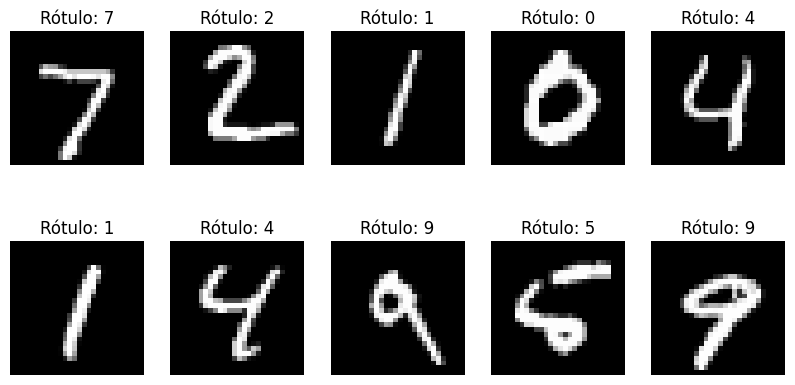

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Rótulo: {y_test[i]}')
plt.show()

## Definindo e Construindo o Modelo

In [6]:
model = Sequential([
    Input(shape=(28, 28)),  # Define a forma de entrada
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilando o modelo

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Treinando o modelo

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8658 - loss: 0.4641 - val_accuracy: 0.9588 - val_loss: 0.1434
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9642 - loss: 0.1154 - val_accuracy: 0.9645 - val_loss: 0.1146
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0769 - val_accuracy: 0.9695 - val_loss: 0.1038
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.9729 - val_loss: 0.0973
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9732 - val_loss: 0.0944
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9887 - loss: 0.0331 - val_accuracy: 0.9758 - val_loss: 0.0927
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9762 - val_loss: 0.0942
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9932 - loss: 0.020

## Avaliando o modelo

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.1330
Acurácia no conjunto de teste: 0.9753


## Fazendo Previsões

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


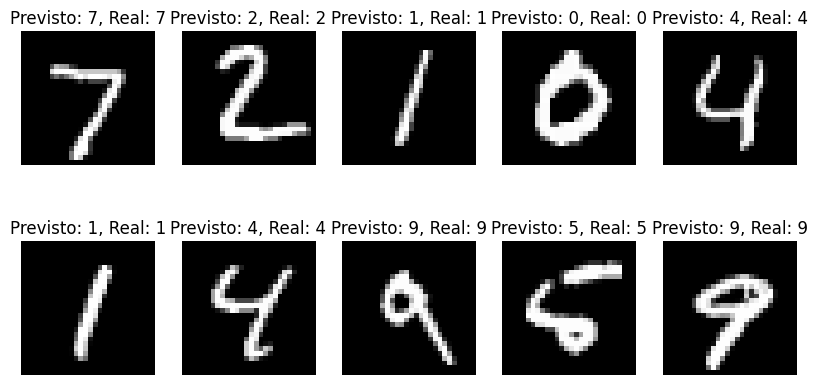

In [10]:
predictions = model.predict(x_test[:10]) # Para 10 imagens

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Previsto: {np.argmax(predictions[i])}, Real: {y_test[i]}')
plt.show()

## Visualizando a Convergência do Treinamento

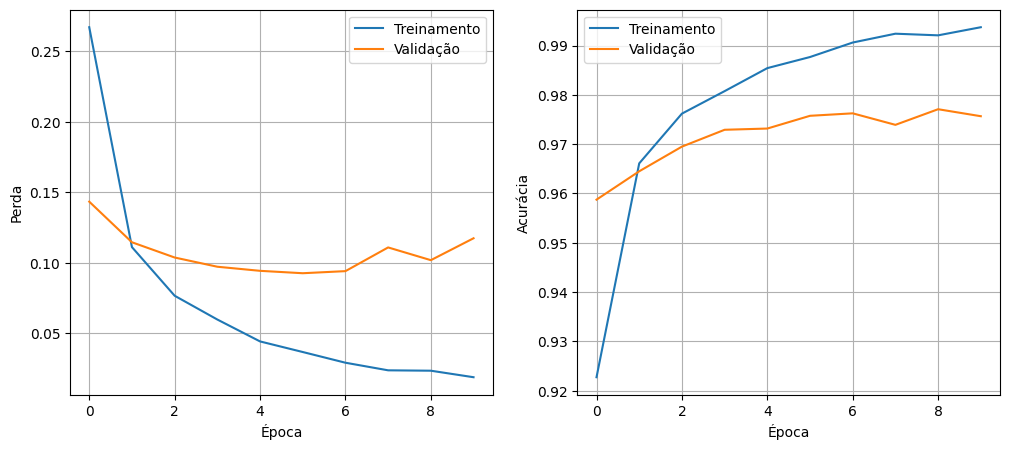

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

## Matriz de confusão

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


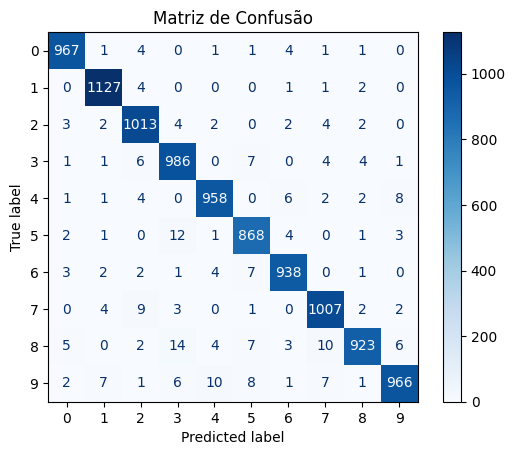

In [12]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

## Salvando o modelo

In [13]:
# Salvando modelo
model.save('mlp_mnist_model.h5')